In [1]:
execfile('test_python.py')

###########
# AlGDock #
###########
Molecular docking with adaptively scaled alchemical interaction grids

in /Users/dminh/Applications/miniconda2/envs/algdock/lib/python2.7/site-packages/AlGDock/BindingPMF.py
last modified Tue Dec 20 18:46:15 2016
    
using 4/4 available cores
using random number seed of -1
  no progress information for dock
  no progress information for cool

*** Directories ***
  start: /Users/dminh/Installers/AlGDock-0.0.1/Example
  cool: /Users/dminh/Installers/AlGDock-0.0.1/Example/cool
  dock: /Users/dminh/Installers/AlGDock-0.0.1/Example/dock

>>> Decompressing tarballs
looking for:
  complex.trans.inpcrd
  complex.pdb
  ligand.mol2
  receptor.trans.inpcrd
  ligand.trans.inpcrd
  ligand.prmtop
  ligand.db
  receptor.pdb
  complex.prmtop
  ligand.rb
  receptor.prmtop
  and frcmod files
reading prmtopcrd/complex.tar.gz
  extracted complex.pdb
  extracted complex.prmtop
  extracted complex.trans.inpcrd
reading prmtopcrd/receptor.tar.gz
  extracted receptor.pdb
  

/Users/dminh/Applications/miniconda2/envs/algdock/lib/python2.7/site-packages/scipy/optimize/minpack.py:237: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


  saving 6 configurations in cycle 2 in 1.10 s (tau_ac=4.3743)
  Sampler 108/175=0.62 (1.3 s); repX t 0.1 s
  wrote to cool_progress.pkl.gz
  wrote to cool_data.pkl.gz

  calculated cooling free energy of 33.88 RT using cycles 1 to 2

Elapsed time for 2 cycles of replica exchange was 3.16 s

>>> Postprocessing
    starting at Tue, 20 Dec 2016 20:32:10 +0000

  postprocessed cool, state 6, cycle 1, LNAMD_OBC in 0.22 s
  postprocessed cool, state 6, cycle 0, LNAMD_Gas in 0.24 s
  postprocessed cool, state 6, cycle 0, LNAMD_OBC in 0.25 s
  postprocessed cool, state 6, cycle 1, LNAMD_Gas in 0.24 s
  postprocessed cool, state 6, cycle 2, LNAMD_Gas in 0.19 s
  postprocessed cool, state 6, cycle 2, LNAMD_OBC in 0.18 s
  an average of 0.030833 s per LNAMD_OBC snapshot
  an average of 0.032234 s per LNAMD_Gas snapshot
  wrote to cool_progress.pkl.gz
  wrote to cool_data.pkl.gz

Elapsed time for postprocessing was 0.94 s

>>> Ligand free energy calculations
    starting at Tue, 20 Dec 2016 20:32

In [2]:
def time_loop(force_field_name):
    import time
    t = time.time()
    for r in range(1000):
        (en,grad)=self.universe.energyAndGradients()
    print 'Time for %s: %.3f'%(force_field_name, time.time() - t)

In [3]:
self._set_universe_evaluator(self._lambda(1.0,process='cool'))
time_loop('MMTK')

Time for MMTK: 0.045


In [4]:
from AlGDock.ForceFields.OpenMM.OpenMM import OpenMMForceField
self._forceFields['OpenMM_Gas'] = OpenMMForceField(
    self._FNs['prmtop']['L'], \
    self.molecule.prmtop_atom_order, 
    self.molecule.inv_prmtop_atom_order, 
    implicitSolvent='OpenMM_Gas')
self.universe.setForceField(self._forceFields['OpenMM_Gas'])
(en_OpenMM_Gas,grad_OpenMM_Gas)=self.universe.energyAndGradients()
time_loop('OpenMM_Gas')

Time for OpenMM_Gas: 2.039


In [5]:
from AlGDock.ForceFields.OpenMM.OpenMM import OpenMMForceField
self._forceFields['OpenMM_OBC2'] = OpenMMForceField(
    self._FNs['prmtop']['L'], \
    self.molecule.prmtop_atom_order, 
    self.molecule.inv_prmtop_atom_order, 
    implicitSolvent='OpenMM_OBC2')
self.universe.setForceField(self._forceFields['OpenMM_OBC2'])
(en_OpenMM_OBC2,grad_OpenMM_OBC2)=self.universe.energyAndGradients()
time_loop('OpenMM_OBC2')

/Users/dminh/Applications/miniconda2/envs/algdock/lib/python2.7/site-packages/simtk/openmm/app/internal/amber_file_parser.py:1010: UserWarning: Non-optimal GB parameters detected for GB model OBC2
  'model %s' % gbmodel)


Time for OpenMM_OBC2: 2.545


In [6]:
from AlGDock.ForceFields.OBC.OBC import OBCForceField

self._forceFields['OBC'] = OBCForceField(self._FNs['prmtop']['L'],
                                         self.molecule.prmtop_atom_order,self.molecule.inv_prmtop_atom_order)
self.universe.setForceField(self._forceFields['OBC'])
(en_OBC,grad_OBC)=self.universe.energyAndGradients()
time_loop('OBC')

Time for OBC: 0.109


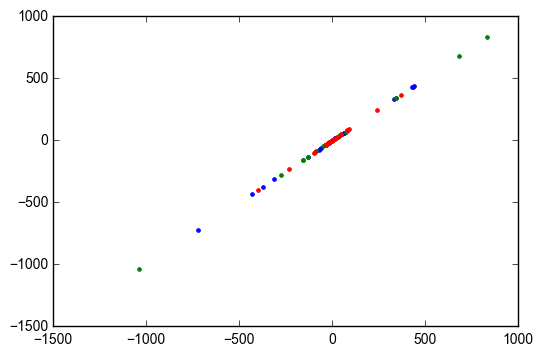

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grad_OpenMM_OBC2-grad_OpenMM_Gas,grad_OBC,'.')

In [8]:
(0.458+0.221)/0.221

3.072398190045249

Calculations with the GBSA implicit solvent are expected to take 3x longer than without.

In [10]:
self.universe.setForceField(self._forceFields['OBC'] + self._forceFields['gaff'])

In [12]:
(en_OBC_all,grad_OBC_all)=self.universe.energyAndGradients()

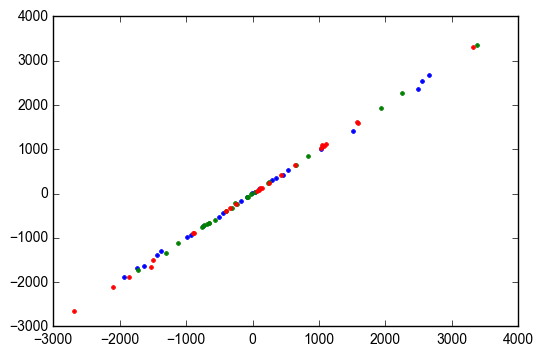

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grad_OpenMM_OBC2,grad_OBC_all,'.')